In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


Data cleaning is definitely a "practice makes perfect" skill. Using this dataset of article open-access prices paid by the WELLCOME Trust between 2012 and 2013, determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal . You will need to do considerable data cleaning in order to extract accurate estimates, and may want to look into data encoding methods if you get stuck. For a real bonus round, identify the open access prices paid by subject area.

In [2]:
df = pd.read_csv('WELLCOME.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [4]:
df.columns

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       'COST (£) charged to Wellcome (inc VAT when charged)'],
      dtype='object')

In [5]:
#Rename column Cost
df = df.rename(columns={'COST (£) charged to Wellcome (inc VAT when charged)':'Cost'})
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,Cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [6]:
df.describe()

,PMID/PMCID,Publisher,Journal title,Article title,Cost
count,1928,2127,2126,2127,2127
unique,1880,299,984,2126,1402
top,Not yet available,Elsevier,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,387,92,2,94


In [7]:
#use .unique() to check for all unique values
df.Publisher.unique()

array(['CUP', 'ACS', 'ACS (Amercian Chemical Society) Publications',
       'ACS Publications', 'AGA Institute', 'AMBSB',
       'American Association of Immunologists',
       'American Chemical Society', 'AMERICAN CHEMICAL SOCIETY',
       'American Chemical Society Publications',
       'American College of Chest Physicians',
       'American Physiological Society',
       'American Psychiatric Association',
       'American Psychiatric Publishing',
       'American Psychological Association',
       'American Psychological Association ',
       'American Public Health Association',
       'American Soc for Biochemistry and Molecular Biology',
       'American Society for Biochemistry and Molecular Biolgy',
       'American Society for Biochemistry and Molecular Biology',
       'American Society for Biochemistry and Molecular Biology ',
       'American Society for Investigative Pathology',
       'American Society for Microbiology',
       'American Society for Microbiology ',
   

In [8]:
#format names in all caps and remove leading and tailing whitespace
df['Publisher'] = df.Publisher.str.strip().str.upper()
df.Publisher.value_counts()

ELSEVIER                                                      399
PUBLIC LIBRARY OF SCIENCE                                     278
WILEY                                                         148
OXFORD UNIVERSITY PRESS                                        85
SPRINGER                                                       82
BIOMED CENTRAL                                                 60
WILEY-BLACKWELL                                                56
OUP                                                            56
NATURE PUBLISHING GROUP                                        49
ASBMB                                                          46
BMC                                                            26
NATURE                                                         25
BMJ                                                            25
PLOS                                                           24
FRONTIERS                                                      23
ROYAL SOCI

In [9]:
df.Publisher.replace(r'(^.*SPRINGER.*$)', 'SPRINGER', inplace=True, regex=True)
df.Publisher.replace(r'(^.*WILEY.*$)', 'WILEY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*OUP.*$)', 'OXFORD UNIVERSITY PRESS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*PLOS.*$)', 'PUBLIC LIBRARY OF SCIENCE', inplace=True, regex=True)
df.Publisher.replace(r'(^.*PUBMED.*$)', 'PUBMED', inplace=True, regex=True)
df.Publisher.replace(r'(^.*PORTLAND.*$)', 'PORTLAND PRESS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*BMJ.*$)', 'BRITISH MEDICAL JOURNAL', inplace=True, regex=True)
df.Publisher.replace(r'(^.*BMC.*$)', 'BIOMED CENTRAL', inplace=True, regex=True)
df.Publisher.replace(r'(^.*CUP.*$)', 'CAMBRIDGE UNIVERSITY PRESS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*ACS.*$)', 'AMERICAN CHEMICAL SOCIETY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*CADMUS.*$)', 'CADMUS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*ELSEV.*$)', 'ELSEVIER', inplace=True, regex=True)
df.Publisher.replace(r'(^.*COLD SPRING.*$)', 'COLD SPRING HARBOUR', inplace=True, regex=True)
df.Publisher.replace(r'(^.*CAMBRIDGE.*$)', 'CAMBRIDGE UNIVERSITY PRESS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*MIT.*$)', 'MIT', inplace=True, regex=True)
df.Publisher.replace(r'(^.*WOLTERS.*$)', 'WOLTERS KLUWER', inplace=True, regex=True)
df.Publisher.replace(r'(^.*AMERICAN PSYCH.*$)', 'AMERICAN PSYCHIATIC', inplace=True, regex=True)
df.Publisher.replace(r'(^.*AMERICAN SOCIETY FOR MICROB.*$)', 'AMERICAN SOCIETY OF MICROBIOLOGY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*BIOCHEMISTRY AND MOLECULAR.*$)', 'ASBMB', inplace=True, regex=True)
df.Publisher.replace(r'(^.*CENVEO.*$)', 'CENVEO', inplace=True, regex=True)
df.Publisher.replace(r'(^.*TAYLOR &.*$)', 'TAYLOR AND FRANCIS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*T&F.*$)', 'TAYLOR AND FRANCIS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*COMPANY OF BIO.*$)', 'THE COMPANCY OF BIOLOGISTS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*BLACKWELL.*$)', 'WILEY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*INFORMA.*$)', 'INFORMA', inplace=True, regex=True)
df.Publisher.replace(r'(^.*ASBMB.*$)', 'ASBMB', inplace=True, regex=True)
df.Publisher.replace(r'(^.*FRONTIERS.*$)', 'FRONTIERS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*AMERICAN SOCIETY OF H.*$)', 'AMERICAN SOCIETY OF HEMATOLOGY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*HINDAWI.*$)', 'HINDAWI', inplace=True, regex=True)
df.Publisher.replace(r'(^.*ENDROCRINE.*$)', 'ENDOCRINE SOCIETY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*SOCIETY FOR NEURO.*$)', 'SOCIETY OF NEURSCIENCE', inplace=True, regex=True)
df.Publisher.replace(r'(^.*SOCIETY OF NEURO.*$)', 'SOCIETY OF NEURSCIENCE', inplace=True, regex=True)
df.Publisher.replace(r'(^.*SAGE.*$)', 'SAGE', inplace=True, regex=True)
df.Publisher.replace(r'(^.*SHERIDAN.*$)', 'SHERIDAN PRESS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*RSC.*$)', 'RSC', inplace=True, regex=True)
df.Publisher.replace(r'(^.*ROYAL SOCIETY.*$)', 'RSC', inplace=True, regex=True)
df.Publisher.replace(r'(^.*OXFORD.*$)', 'OXFORD UNIVERSITY PRESS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*NATIONAL ACADEMY OF SCIE.*$)', 'PNAS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*MARY ANN.*$)', 'MARY ANN LIEBERT', inplace=True, regex=True)
df.Publisher.replace(r'(^.*FUTURE.*$)', 'FUTURE MEDICINE', inplace=True, regex=True)
df.Publisher.replace(r'(^.*IMPACT.*$)', 'IMPACT JOURNALS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*BENTHA.*$)', 'BENTHAM SCIENCE', inplace=True, regex=True)
df.Publisher.replace(r'(^.*DARTMOUTH.*$)', 'DARTMOUTH JOURNALS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*DARMOUTH.*$)', 'DARTMOUTH JOURNALS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*FASEB.*$)', 'FEDERATION OF AMERICAN SOCIETIES FOR EXPERIMENTAL BIOLOGY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*IUCR.*$)', 'INTERNATIONAL UNION OF CRYSTALLOGRAPHY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*JOVE.*$)', 'JOVE', inplace=True, regex=True)
df.Publisher.replace(r'(^.*PNAS.*$)', 'PNAS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*JOVE.*$)', 'JOVE', inplace=True, regex=True)
df.Publisher.replace(r'(^.*BYOP.*$)', 'BIOPYSICAL SOCIETY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*ASM.*$)', 'AMERICAN SOCIETY OF MICROBIOLOGY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*NATURE.*$)', 'NATURE', inplace=True, regex=True)
df.Publisher.replace(r'(^.*NPG.*$)', 'NATURE', inplace=True, regex=True)
df.Publisher.replace(r'(^.*FERRATA.*$)', 'FERRATA', inplace=True, regex=True)
df.Publisher.replace(r'(^.*LANDES.*$)', 'LANDES BIOSCIENCE', inplace=True, regex=True)
df.Publisher.replace(r'(^.*MACMILLAN.*$)', 'MACMILLAN', inplace=True, regex=True)
df.Publisher.replace(r'(^.*SOCIETY FOR GENERMAL MICROBIOLOGY.*$)', 'SOCIETY FOR GENERAL MICROBIOLOGY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*SOCIETY OF GENERAL MICROBIOLOGY.*$)', 'SOCIETY FOR GENERAL MICROBIOLOGY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*BIOPYSICAL.*$)', 'BIOPHYSICAL SOCIETY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*BIOMED CENTRAL.*$)', 'BIOMED CENTRAL', inplace=True, regex=True)
df.Publisher.replace(r'(^.*THE AMERICAN PHYSIOLOGICAL SOCIETY.*$)', 'AMERICAN PHYSIOLOGICAL SOCIETY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*ENDOCRINE SOC.*$)', 'ENDOCRINE SOCIETY', inplace=True, regex=True)
df.Publisher.replace(r'(^.*ROYAL COLLEGE OF PSYCHIATRISTS.*$)', 'ROYAL COLLEGE OF PSYCHIATRISTS', inplace=True, regex=True)
df.Publisher.replace(r'(^.*AMBSB.*$)', 'ASBMB', inplace=True, regex=True)

df.Publisher.value_counts()

ELSEVIER                                                      409
PUBLIC LIBRARY OF SCIENCE                                     307
WILEY                                                         270
OXFORD UNIVERSITY PRESS                                       247
SPRINGER                                                       95
BIOMED CENTRAL                                                 89
ASBMB                                                          70
RSC                                                            48
PNAS                                                           36
CAMBRIDGE UNIVERSITY PRESS                                     33
FRONTIERS                                                      32
NATURE                                                         31
AMERICAN CHEMICAL SOCIETY                                      29
BRITISH MEDICAL JOURNAL                                        28
THE COMPANCY OF BIOLOGISTS                                     27
AMERICAN S

In [10]:
#remove all characters that aren't digits
df['Cost'] = df['Cost'].str.replace('£','')
df['Cost'] = df['Cost'].str.replace('$','').astype('float64')

df.Cost.value_counts()

2040.00      94
999999.00    47
1500.00      37
2400.00      32
2100.00      30
1800.00      28
3000.00      26
1700.00      21
825.68       19
1834.77      18
2034.00      17
852.00       16
1680.00      16
1920.00      13
2010.24      11
3120.00      11
2340.00      11
1620.00      10
1260.00       8
1536.00       8
1704.00       8
1836.92       7
1044.00       7
2145.60       7
2415.37       6
1315.80       6
2377.65       6
2625.60       6
2184.22       6
1939.95       6
             ..
2286.73       1
967.18        1
2381.62       1
1639.06       1
886.30        1
159.74        1
1160.09       1
2381.04       1
572.74        1
1301.25       1
187.03        1
1384.34       1
2232.74       1
1930.88       1
1670.77       1
1758.89       1
1439.45       1
1157.88       1
1889.00       1
750.16        1
614.73        1
2363.76       1
1694.68       1
747.05        1
1577.90       1
1676.06       1
1551.49       1
1809.51       1
1309.50       1
0.00          1
Name: Cost, Length: 1395

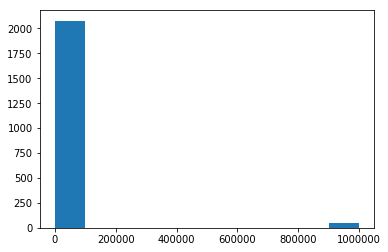

In [11]:
#checking for outliers
plt.hist(df['Cost'])
plt.show()

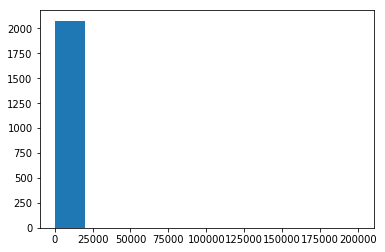

In [15]:
#drop columns with outliers - removing 0 cost and 999999
df = df[(df.Cost != 0) & (df.Cost != 999999.00)]
plt.hist(df['Cost'])
plt.show()

In [16]:
#finding total number of articles for 5 most common journals
df.Publisher.value_counts().nlargest(5)

ELSEVIER                     399
PUBLIC LIBRARY OF SCIENCE    292
WILEY                        266
OXFORD UNIVERSITY PRESS      243
SPRINGER                      95
Name: Publisher, dtype: int64

In [19]:
elsevier = df[df.Publisher == 'ELSEVIER']
print(elsevier.Cost.mean())
print(elsevier.Cost.median())
print(elsevier.Cost.std())

2435.015814536341
2343.65
793.4248862918353


In [20]:
plos = df[df.Publisher == 'PUBLIC LIBRARY OF SCIENCE']
print(plos.Cost.mean())
print(plos.Cost.median())
print(plos.Cost.std())

1790.3371232876711
1020.425
11214.64046076218


In [21]:
wiley = df[df.Publisher == 'WILEY']
print(wiley.Cost.mean())
print(wiley.Cost.median())
print(wiley.Cost.std())

2758.9619548872174
2007.74
12207.951008386293


In [22]:
oxford = df[df.Publisher == 'OXFORD UNIVERSITY PRESS']
print(oxford.Cost.mean())
print(oxford.Cost.median())
print(oxford.Cost.std())

2085.882880658436
2040.0
679.9404627733674


In [23]:
springer = df[df.Publisher == 'SPRINGER']
print(springer.Cost.mean())
print(springer.Cost.median())
print(springer.Cost.std())

2026.0461052631576
1981.19
270.94719569677454
